In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
year = 2020
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)

In [4]:
page = requests.get(url)
soup = BeautifulSoup(page.text,'html.parser')

In [5]:
soup.findAll('tr',limit=2)
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
headers = headers[1:]

In [6]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
stats = pd.DataFrame(player_stats,columns = headers)

In [7]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  651 non-null    object
 1   Pos     651 non-null    object
 2   Age     651 non-null    object
 3   Tm      651 non-null    object
 4   G       651 non-null    object
 5   GS      651 non-null    object
 6   MP      651 non-null    object
 7   FG      651 non-null    object
 8   FGA     651 non-null    object
 9   FG%     651 non-null    object
 10  3P      651 non-null    object
 11  3PA     651 non-null    object
 12  3P%     651 non-null    object
 13  2P      651 non-null    object
 14  2PA     651 non-null    object
 15  2P%     651 non-null    object
 16  eFG%    651 non-null    object
 17  FT      651 non-null    object
 18  FTA     651 non-null    object
 19  FT%     651 non-null    object
 20  ORB     651 non-null    object
 21  DRB     651 non-null    object
 22  TRB     651 non-null    ob

In [8]:
stats.describe()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,651,651,651,651,651,651,651,651,651,651,...,651,651,651,651,651,651,651,651,651,651
unique,529,14,22,31,74,72,276,95,175,274,...,272,40,86,103,72,22,25,43,41,207
top,Anthony Tolliver,SG,24,TOT,58,0,34.3,1.3,3.0,.500,...,1.0,0.3,1.6,2.3,0.8,0.4,0.1,0.8,1.9,1.0
freq,4,143,79,60,17,191,6,28,11,17,...,34,74,22,23,34,77,109,49,39,11


In [9]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,...,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [10]:
rowindex = ['Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']
age, G, GS, MP, FG, FGA, FGper, s3P, s3PA, s3Pper, s2P, s2PA, s2Pper, eFGper, FT, FTA, FTper, ORB, DRB,TRB, AST, STL, BLK, TOV,PF,PTS = 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB','AST','STL','BLK','TOV','PF','PTS'

In [11]:
for i in rowindex:
    stats[i] = stats[i].apply(pd.to_numeric)


stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  651 non-null    object 
 1   Pos     651 non-null    object 
 2   Age     651 non-null    float64
 3   Tm      651 non-null    object 
 4   G       651 non-null    float64
 5   GS      651 non-null    float64
 6   MP      651 non-null    float64
 7   FG      651 non-null    float64
 8   FGA     651 non-null    float64
 9   FG%     649 non-null    float64
 10  3P      651 non-null    float64
 11  3PA     651 non-null    float64
 12  3P%     616 non-null    float64
 13  2P      651 non-null    float64
 14  2PA     651 non-null    float64
 15  2P%     645 non-null    float64
 16  eFG%    649 non-null    float64
 17  FT      651 non-null    float64
 18  FTA     651 non-null    float64
 19  FT%     618 non-null    float64
 20  ORB     651 non-null    float64
 21  DRB     651 non-null    float64
 22  TR

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='eFG%', ylabel='Count'>

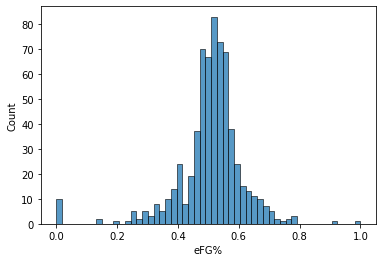

In [13]:
sns.histplot(x=eFGper, data = stats)

<AxesSubplot:xlabel='2P%', ylabel='Count'>

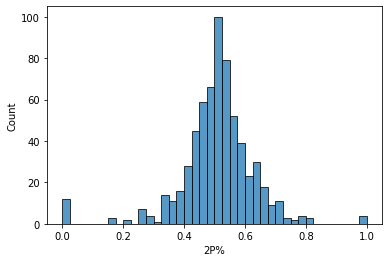

In [14]:
sns.histplot(x=s2Pper,data=stats)

<AxesSubplot:xlabel='3P%', ylabel='Count'>

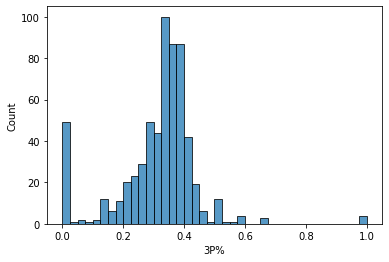

In [15]:
sns.histplot(x=s3Pper,data=stats)

In [16]:
stats.fillna(value=0)    

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,1.0,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Trae Young,PG,21.0,ATL,60.0,60.0,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,Cody Zeller,C,27.0,CHO,58.0,39.0,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,Tyler Zeller,C,30.0,SAS,2.0,0.0,2.0,0.5,2.0,0.250,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,Ante Žižić,C,23.0,CLE,22.0,0.0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [17]:
#The Hollinger Game Score stat: PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV.
hollpts,hollfg,hollfga,hollfta,hollft,hollorb,holldrb,hollstl,hollast,hollblk,hollpf,holltov = [],[],[],[],[],[],[],[],[],[],[],[]

def get_holl(pts,fg,fga,fta,ft,orb,drb,stl,ast,blk,pf,tov):
    hollingerEQ = lambda PTS,FG,FGA,FTA,FT,ORB,DRB,STL,AST,BLK,PF,TOV: PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV
    return hollingerEQ(pts,fg,fga,fta,ft,orb,drb,stl,ast,blk,pf,tov)
    # for i in range(677):
    #     hollpts.append(stats[PTS].loc[i])



In [18]:
GameScore = []
for i in range(677):
    hollpts.append(stats['PTS'].iloc[i])
    hollfg.append(stats['FG'].iloc[i])
    hollfga.append(stats['FGA'].iloc[i])
    hollfta.append(stats['FTA'].iloc[i])
    hollft.append(stats['FT'].iloc[i])
    hollorb.append(stats['ORB'].iloc[i])
    holldrb.append(stats['DRB'].iloc[i])
    hollstl.append(stats['STL'].iloc[i])
    hollast.append(stats['AST'].iloc[i])
    hollblk.append(stats['BLK'].iloc[i])
    hollpf.append(stats['PF'].iloc[i])
    holltov.append(stats['TOV'].iloc[i])

for i in range(677):
    GameScore.append(round(get_holl(hollpts[i],hollfg[i],hollfga[i],hollfta[i],hollft[i],hollorb[i],holldrb[i],hollstl[i],hollast[i],hollblk[i],hollpf[i],holltov[i]),5))

In [19]:
stats['Game Score'] = GameScore

In [20]:
stats.head(1)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Game Score
0,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,11.89


In [21]:
stats[stats['Game Score'] == stats['Game Score'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Game Score
266,James Harden,SG,30.0,HOU,68.0,68.0,36.5,9.9,22.3,0.444,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,26.22


In [22]:
stats[stats['Game Score'] == stats['Game Score'].min()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Game Score
310,William Howard,PF,26.0,HOU,2.0,0.0,6.5,0.0,2.0,0.0,...,0.0,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,-1.45


In [23]:
stats.set_index('Player')

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Game Score
Player,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,0.0,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,11.89
Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.557,0.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,15.80
LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,1.2,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,15.24
Kyle Alexander,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500,0.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,0.65
Nickeil Alexander-Walker,SG,21.0,NOP,47.0,1.0,12.6,2.1,5.7,0.368,1.0,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,3.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trae Young,PG,21.0,ATL,60.0,60.0,35.3,9.1,20.8,0.437,3.4,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,21.82
Cody Zeller,C,27.0,CHO,58.0,39.0,23.1,4.3,8.3,0.524,0.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,9.63
Tyler Zeller,C,30.0,SAS,2.0,0.0,2.0,0.5,2.0,0.250,0.0,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00


In [46]:
stats.nlargest(10,['Game Score'])

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Game Score
266,James Harden,SG,30.0,HOU,68.0,68.0,36.5,9.9,22.3,0.444,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,26.22
12,Giannis Antetokounmpo,PF,25.0,MIL,63.0,63.0,30.4,10.9,19.7,0.553,...,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,24.23
390,Damian Lillard,PG,29.0,POR,66.0,66.0,37.5,9.5,20.4,0.463,...,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,24.02
183,Luka Dončić,PG,20.0,DAL,61.0,61.0,33.6,9.5,20.6,0.463,...,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,22.64
168,Anthony Davis,PF,26.0,LAL,62.0,62.0,34.4,8.9,17.7,0.503,...,2.3,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1,22.31
672,Trae Young,PG,21.0,ATL,60.0,60.0,35.3,9.1,20.8,0.437,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,21.82
605,Karl-Anthony Towns,C,24.0,MIN,35.0,35.0,33.9,9.0,17.8,0.508,...,2.7,8.1,10.8,4.4,0.9,1.2,3.1,3.3,26.5,21.80
331,LeBron James,PG,35.0,LAL,67.0,67.0,34.6,9.6,19.4,0.493,...,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3,21.68
41,Bradley Beal,SG,26.0,WAS,57.0,57.0,36.0,10.4,22.9,0.455,...,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,21.24
387,Kawhi Leonard,SF,28.0,LAC,57.0,57.0,32.4,9.3,19.9,0.470,...,0.9,6.1,7.1,4.9,1.8,0.6,2.6,2.0,27.1,21.24


In [40]:
teams = []
for i in stats['Tm']:
    if i not in teams and i != None:
        teams.append(i)


In [41]:
teams.sort()

In [42]:
teams

['ATL',
 'BOS',
 'BRK',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'TOT',
 'UTA',
 'WAS']